# Initial data exploration
---

[Memotion dataset 7k](https://www.kaggle.com/williamscott701/memotion-dataset-7k): Dataset for sentiment classification of memes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

## Load

In [2]:
print('Current directory:', os.getcwd())
print('Changing directory: moving up')
os.chdir('../')
print('Current directory:', os.getcwd())

Current directory: /Users/victor/Desktop/bert-for-memes/notebooks
Changing directory: moving up
Current directory: /Users/victor/Desktop/bert-for-memes


In [3]:
# Pickling
data_raw_path = "data/raw/"
with open(data_raw_path+"labels_pd_pickle","rb") as file_handle:
    labels_df = pickle.load(file_handle)
    
with open(data_raw_path+"reference_df_pickle","rb") as file_handle:
    reference_df = pickle.load(file_handle)

In [4]:
display(labels_df.head(3))
labels_df.shape

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive


(6992, 8)

In [5]:
display(reference_df.head(3))
reference_df.shape

,original_name,image_url,image_name
0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,image_1.jpg
1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,image_2.jpeg
2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,image_3.JPG


(6992, 3)

## Images

JPEG
(735, 500)
RGB


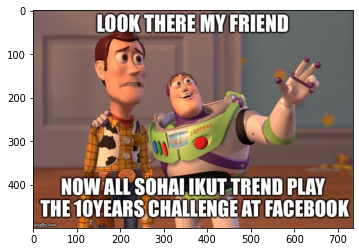

In [6]:
image = Image.open(data_raw_path+"images/"+labels_df.image_name[0])
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
plt.imshow(image)
plt.show()

## Text and labels

In [7]:
labels_df.describe()

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
count,6992,6831,6987,6992,6992,6992,6992,6992
unique,6992,6645,6939,4,4,4,2,5
top,image_1.jpg,"<html><head><meta content=""text/html; charset=...","<html><head><meta content=""text/html; charset=...",funny,general,not_offensive,not_motivational,positive
freq,1,104,5,2452,3507,2713,4525,3127


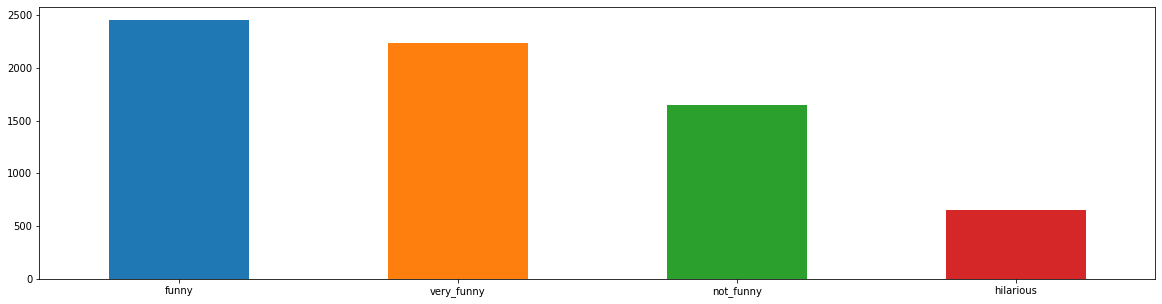

In [8]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
_ = labels_df.humour.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

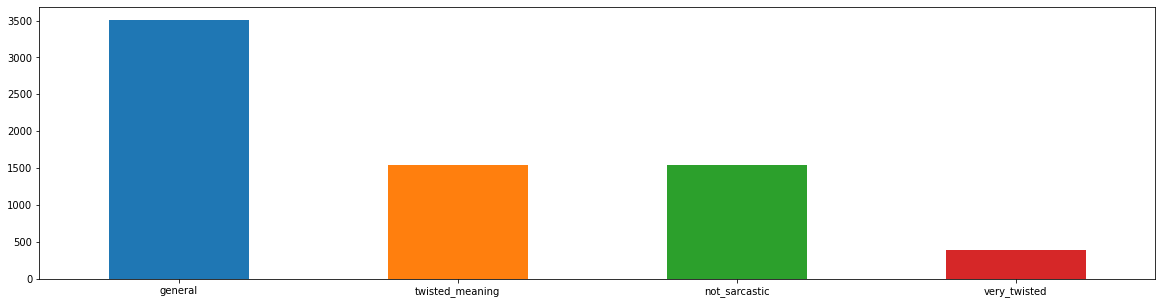

In [9]:
_ = labels_df.sarcasm.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

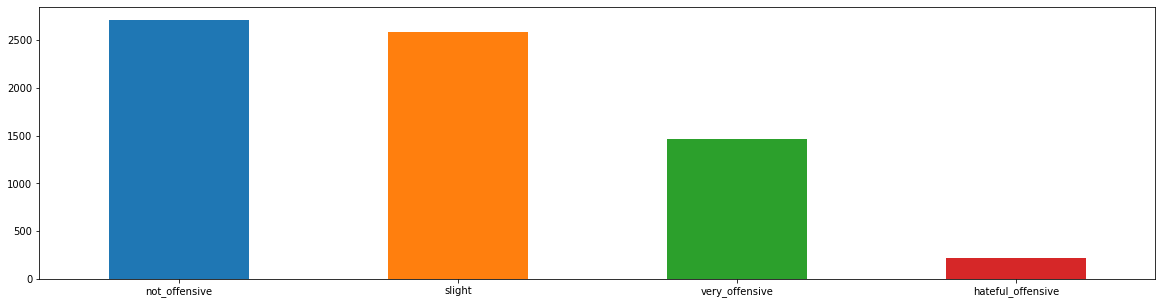

In [10]:
_ = labels_df.offensive.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

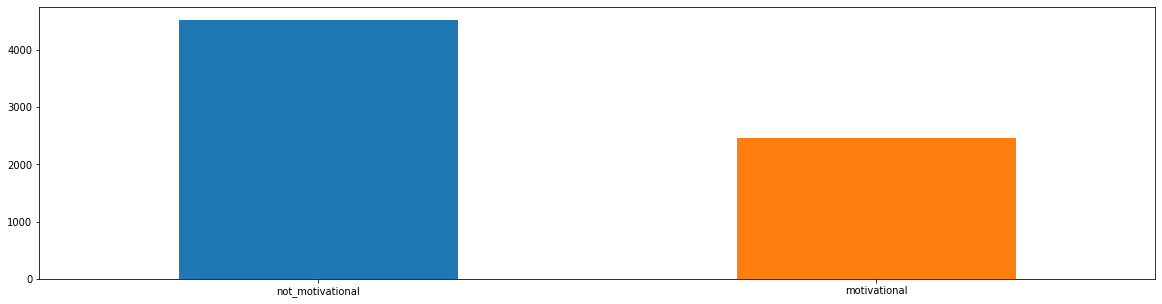

In [11]:
_ = labels_df.motivational.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

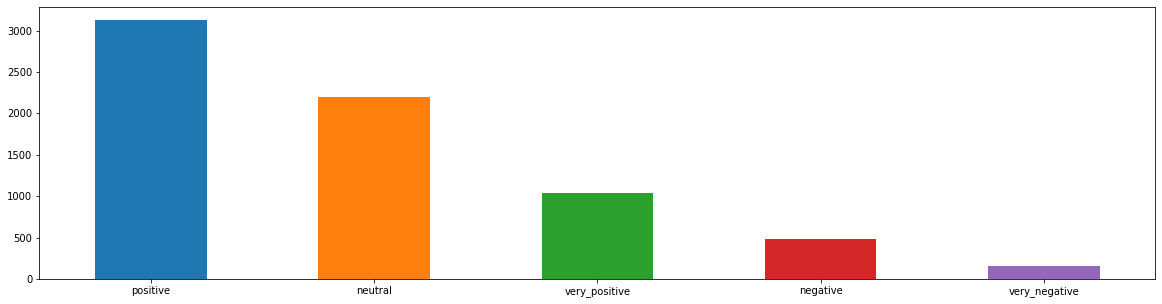

In [12]:
_ = labels_df.overall_sentiment.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)